In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [52]:
BENCHMARK_DIR = os.path.join(os.getcwd(), 'data', 'evaluate')
BENCHMARK_FILE = 'evaluation_results_20251230-164234_20251230_174840_fix_all_tracker.csv'
BENCHMARK_PATH = os.path.join(BENCHMARK_DIR, BENCHMARK_FILE)

if os.path.exists(BENCHMARK_PATH):
    df = pd.read_csv(BENCHMARK_PATH)

In [53]:
df

,idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,...,IDSW_trackeval,CLR_TP,CLR_FN,CLR_FP,algorithm,attempt,inference_time,tracking_time,std_inference_time,std_tracking_time
0,0.417423,0.475683,0.371339,0.437869,0.561949,42.0,7.0,13.0,22.0,2832.0,...,50,2201,6096,4264,BoostTrack,1,0.009600,0.018278,0.004894,0.030064
1,0.417423,0.475683,0.371339,0.437869,0.561949,42.0,7.0,13.0,22.0,2832.0,...,50,2201,6096,4264,BoostTrack,10,0.008463,0.017206,0.002028,0.025553
2,0.417423,0.475683,0.371339,0.437869,0.561949,42.0,7.0,13.0,22.0,2832.0,...,50,2201,6096,4264,BoostTrack,2,0.007585,0.016110,0.002552,0.025120
3,0.417423,0.475683,0.371339,0.437869,0.561949,42.0,7.0,13.0,22.0,2832.0,...,50,2201,6096,4264,BoostTrack,3,0.007498,0.016171,0.002520,0.025136
4,0.417423,0.475683,0.371339,0.437869,0.561949,42.0,7.0,13.0,22.0,2832.0,...,50,2201,6096,4264,BoostTrack,4,0.008236,0.016090,0.002546,0.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.484349,0.446974,0.527781,0.617091,0.523250,42.0,20.0,11.0,11.0,4665.0,...,95,2893,5404,6892,StrongSort,5,0.005977,0.057797,0.001546,0.031318
66,0.484349,0.446974,0.527781,0.617091,0.523250,42.0,20.0,11.0,11.0,4665.0,...,95,2893,5404,6892,StrongSort,6,0.006411,0.059437,0.001374,0.031027
67,0.484349,0.446974,0.527781,0.617091,0.523250,42.0,20.0,11.0,11.0,4665.0,...,95,2893,5404,6892,StrongSort,7,0.006534,0.057945,0.001363,0.028830
68,0.484349,0.446974,0.527781,0.617091,0.523250,42.0,20.0,11.0,11.0,4665.0,...,95,2893,5404,6892,StrongSort,8,0.006601,0.058933,0.001225,0.032087


In [54]:
df.columns

Index(['idf1', 'idp', 'idr', 'recall', 'precision', 'num_unique_objects',
       'mostly_tracked', 'partially_tracked', 'mostly_lost',
       'num_false_positives', 'num_misses', 'num_switches',
       'num_fragmentations', 'mota', 'motp', 'num_transfer', 'num_ascend',
       'num_migrate', 'HOTA', 'DetA', 'AssA', 'DetRe', 'DetPr', 'LocA',
       'MOTA_trackeval', 'MOTP_trackeval', 'IDSW_trackeval', 'CLR_TP',
       'CLR_FN', 'CLR_FP', 'algorithm', 'attempt', 'inference_time',
       'tracking_time', 'std_inference_time', 'std_tracking_time'],
      dtype='object')

In [55]:
# Get unique algorithms and prepare data
algorithms = df['algorithm'].unique()
print(f"Found {len(algorithms)} algorithms: {algorithms}")

# Group by algorithm and calculate mean metrics
algorithm_summary = df.groupby('algorithm').agg({
    'HOTA': ['mean', 'std'],
    'mota': ['mean', 'std'],
    'idf1': ['mean', 'std'],
    'inference_time': ['mean', 'std'],
    'tracking_time': ['mean', 'std']
})

# Convert percentage metrics to 0-100 scale
algorithm_summary[('HOTA', 'mean')] = algorithm_summary[('HOTA', 'mean')] * 100
algorithm_summary[('HOTA', 'std')] = algorithm_summary[('HOTA', 'std')] * 100
algorithm_summary[('mota', 'mean')] = algorithm_summary[('mota', 'mean')] * 100
algorithm_summary[('mota', 'std')] = algorithm_summary[('mota', 'std')] * 100
algorithm_summary[('idf1', 'mean')] = algorithm_summary[('idf1', 'mean')] * 100
algorithm_summary[('idf1', 'std')] = algorithm_summary[('idf1', 'std')] * 100

algorithm_summary = algorithm_summary.round(4)

print("\nAlgorithm Summary Statistics (Percentages in 0-100 scale):")
print(algorithm_summary)

Found 7 algorithms: ['BoostTrack' 'BotSort' 'ByteTrack' 'DeepOcSort' 'HybridSort' 'OcSort'
 'StrongSort']

Algorithm Summary Statistics (Percentages in 0-100 scale):
               HOTA             mota             idf1         inference_time  \
               mean     std     mean     std     mean     std           mean   
algorithm                                                                      
BoostTrack  26.2888  0.0001   8.8960  0.0038  41.7415  0.0027         0.0082   
BotSort     29.2457  0.0010  11.6066  0.0000  43.2856  0.0000         0.0080   
ByteTrack   32.1393  0.0000  22.8516  0.0000  54.1613  0.0000         0.0060   
DeepOcSort  31.6945  0.0005  12.4431  0.0152  49.9988  0.0025         0.0045   
HybridSort  31.6707  0.0013  11.8669  0.0116  52.6422  0.0082         0.0056   
OcSort      34.3341  0.0010  21.7283  0.0076  57.7148  0.0023         0.0069   
StrongSort  31.0892  0.0008   4.2425  0.0000  48.4344  0.0017         0.0064   

                   tracking_time 

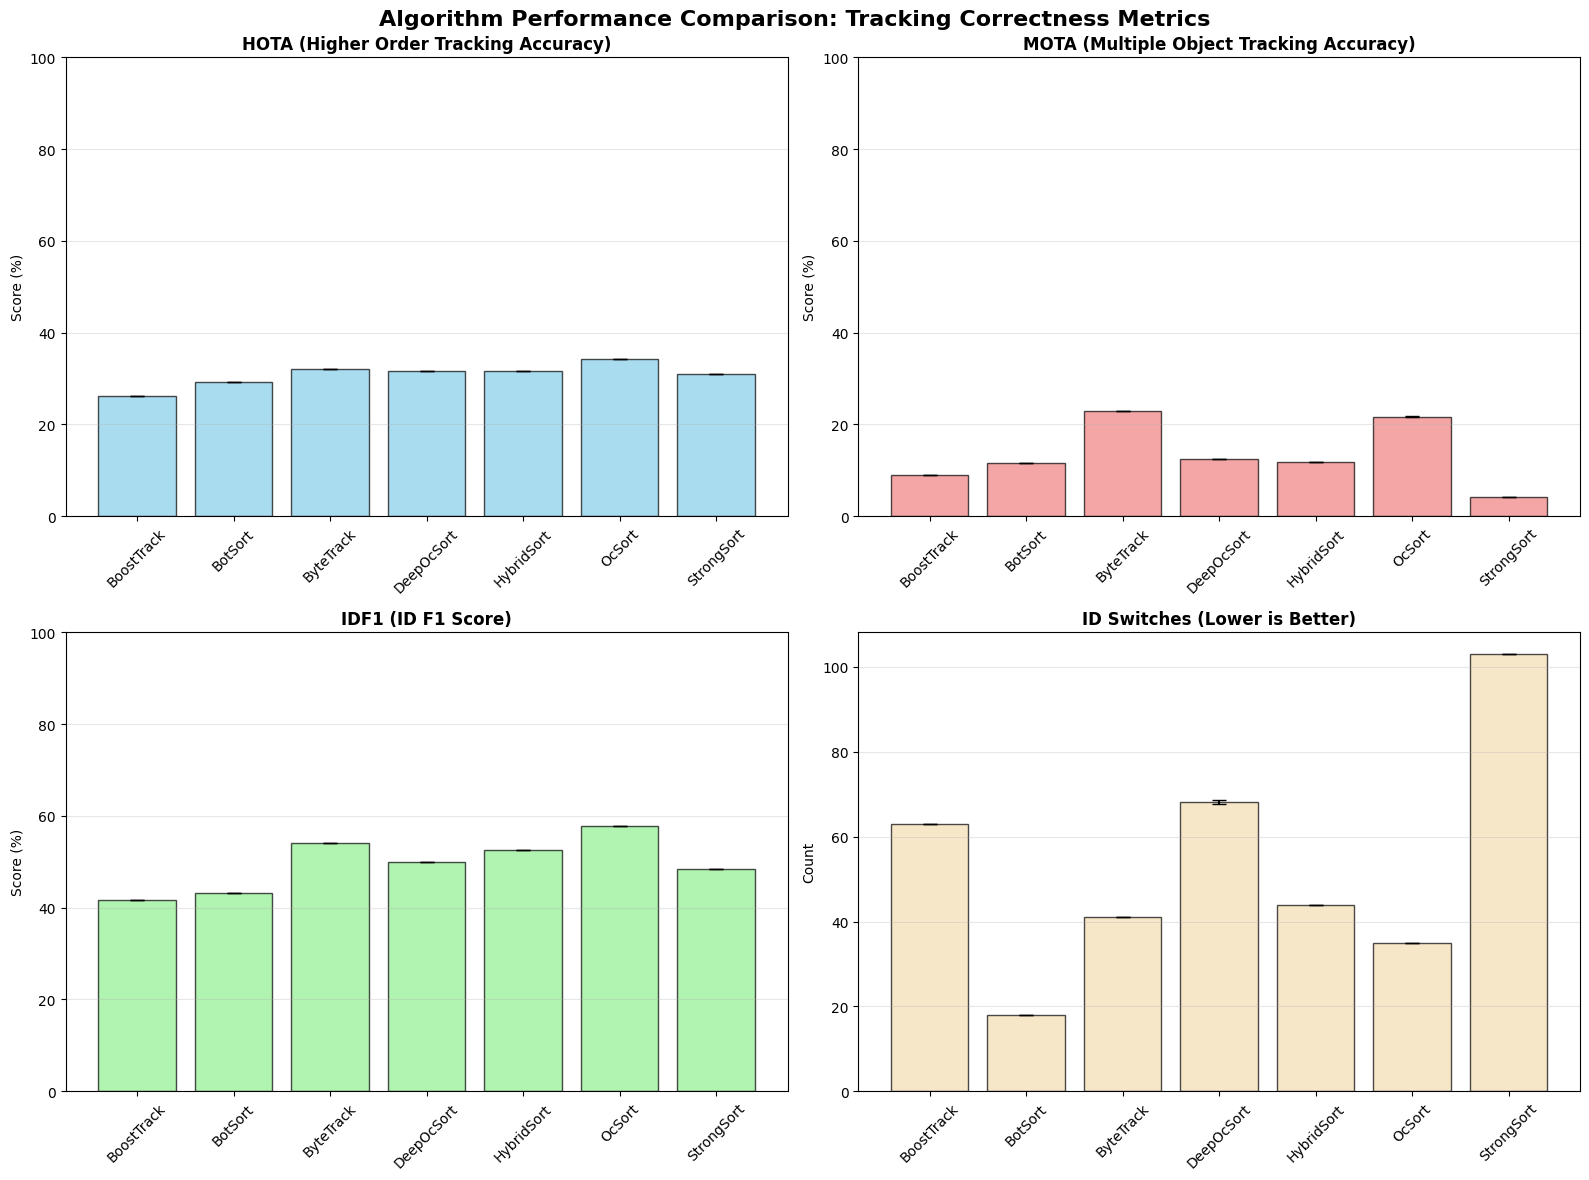

In [56]:
# Create figure with subplots for tracking correctness metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Algorithm Performance Comparison: Tracking Correctness Metrics', fontsize=16, fontweight='bold')

# Prepare data for plotting
algo_means = df.groupby('algorithm').mean()
algo_stds = df.groupby('algorithm').std()

# 1. HOTA (Higher Order Tracking Accuracy)
axes[0, 0].bar(algo_means.index, algo_means['HOTA'] * 100, yerr=algo_stds['HOTA'] * 100, 
               capsize=5, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('HOTA (Higher Order Tracking Accuracy)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Score (%)')
axes[0, 0].set_ylim([0, 100])
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. MOTA (Multiple Object Tracking Accuracy)
axes[0, 1].bar(algo_means.index, algo_means['mota'] * 100, yerr=algo_stds['mota'] * 100,
               capsize=5, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('MOTA (Multiple Object Tracking Accuracy)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Score (%)')
axes[0, 1].set_ylim([0, 100])
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. IDF1 (ID F1 Score)
axes[1, 0].bar(algo_means.index, algo_means['idf1'] * 100, yerr=algo_stds['idf1'] * 100,
               capsize=5, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('IDF1 (ID F1 Score)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Score (%)')
axes[1, 0].set_ylim([0, 100])
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. ID Switches (Lower is better)
axes[1, 1].bar(algo_means.index, algo_means['num_switches'], yerr=algo_stds['num_switches'],
               capsize=5, alpha=0.7, color='wheat', edgecolor='black')
axes[1, 1].set_title('ID Switches (Lower is Better)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

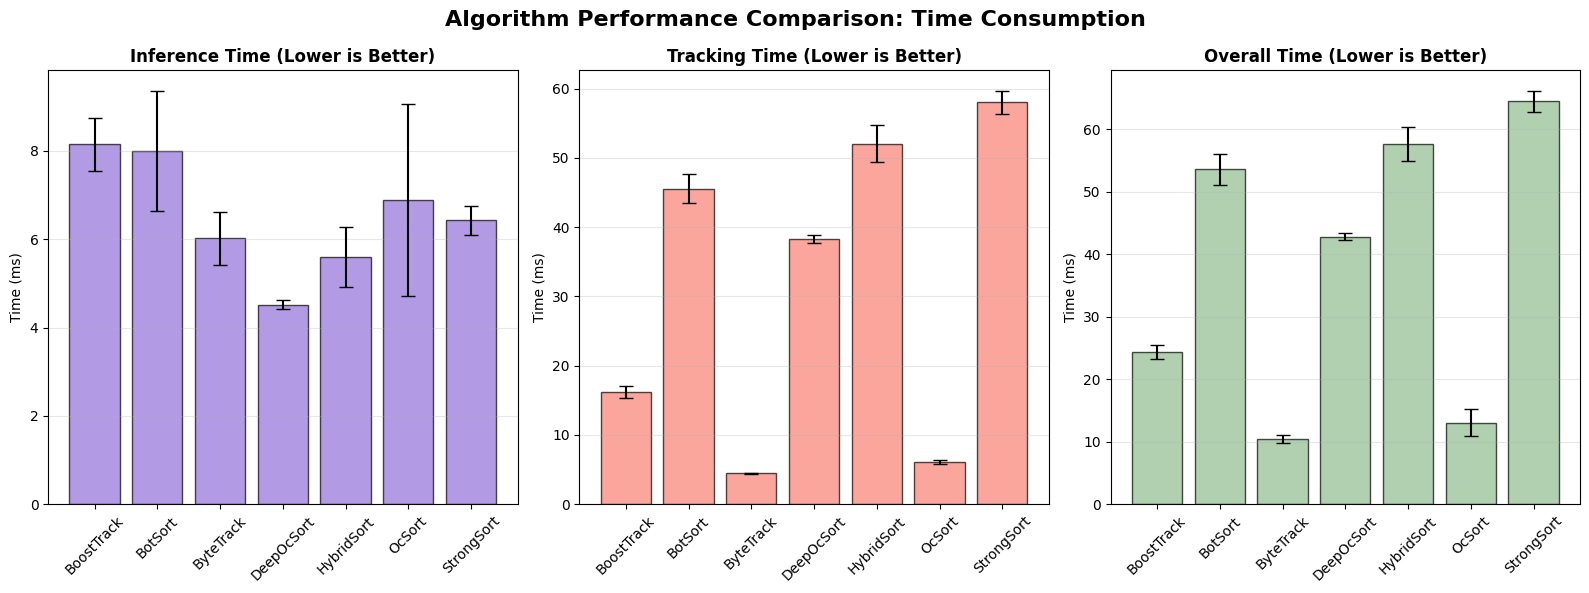

In [57]:
# Create figure for time performance metrics
# Turn to ms
algo_means['inference_time'] = algo_means['inference_time'] * 1000
algo_means['tracking_time'] = algo_means['tracking_time'] * 1000
algo_stds['inference_time'] = algo_stds['inference_time'] * 1000
algo_stds['tracking_time'] = algo_stds['tracking_time'] * 1000

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Algorithm Performance Comparison: Time Consumption', fontsize=16, fontweight='bold')

# 1. Inference Time
axes[0].bar(algo_means.index, algo_means['inference_time'], yerr=algo_stds['inference_time'],
            capsize=5, alpha=0.7, color='mediumpurple', edgecolor='black')
axes[0].set_title('Inference Time (Lower is Better)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# 2. Tracking Time
axes[1].bar(algo_means.index, algo_means['tracking_time'], yerr=algo_stds['tracking_time'],
            capsize=5, alpha=0.7, color='salmon', edgecolor='black')
axes[1].set_title('Tracking Time (Lower is Better)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Time (ms)')
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# 3. Overall Time
overall_time = algo_means['inference_time'] + algo_means['tracking_time']
overall_std = np.sqrt(algo_stds['inference_time']**2 + algo_stds['tracking_time']**2)
axes[2].bar(algo_means.index, overall_time, yerr=overall_std,
            capsize=5, alpha=0.7, color='darkseagreen', edgecolor='black')
axes[2].set_title('Overall Time (Lower is Better)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Time (ms)')
axes[2].grid(axis='y', alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

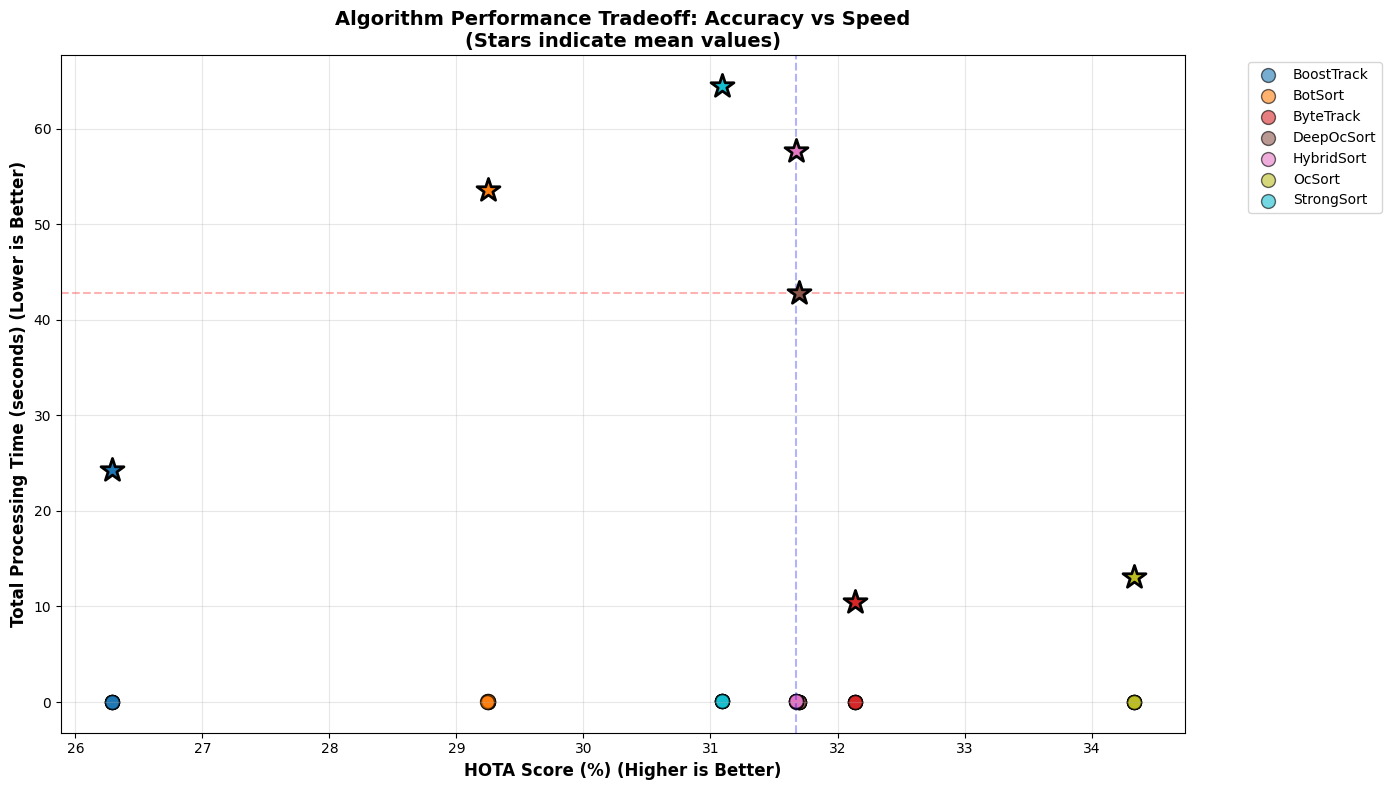

In [58]:
# Combined view: Accuracy vs Speed tradeoff
fig, ax = plt.subplots(figsize=(14, 8))

# Calculate total time (inference + tracking)
algo_means['total_time'] = algo_means['inference_time'] + algo_means['tracking_time']

# Scatter plot: HOTA vs Total Time
colors = plt.cm.tab10(np.linspace(0, 1, len(algorithms)))
for i, algo in enumerate(algorithms):
    algo_data = df[df['algorithm'] == algo]
    ax.scatter(algo_data['HOTA'] * 100, 
               algo_data['inference_time'] + algo_data['tracking_time'],
               s=100, alpha=0.6, color=colors[i], label=algo, edgecolors='black')

# Plot mean points with larger markers
for i, algo in enumerate(algorithms):
    mean_hota = algo_means.loc[algo, 'HOTA'] * 100
    mean_time = algo_means.loc[algo, 'total_time']
    ax.scatter(mean_hota, mean_time, s=300, color=colors[i], 
               marker='*', edgecolors='black', linewidths=2, zorder=10)

ax.set_xlabel('HOTA Score (%) (Higher is Better)', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Processing Time (seconds) (Lower is Better)', fontsize=12, fontweight='bold')
ax.set_title('Algorithm Performance Tradeoff: Accuracy vs Speed\n(Stars indicate mean values)', 
             fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

# Add annotations for the "sweet spot" (high HOTA, low time)
ax.axhline(y=algo_means['total_time'].median(), color='red', linestyle='--', alpha=0.3, label='Median Time')
ax.axvline(x=algo_means['HOTA'].median() * 100, color='blue', linestyle='--', alpha=0.3, label='Median HOTA')

plt.tight_layout()
plt.show()

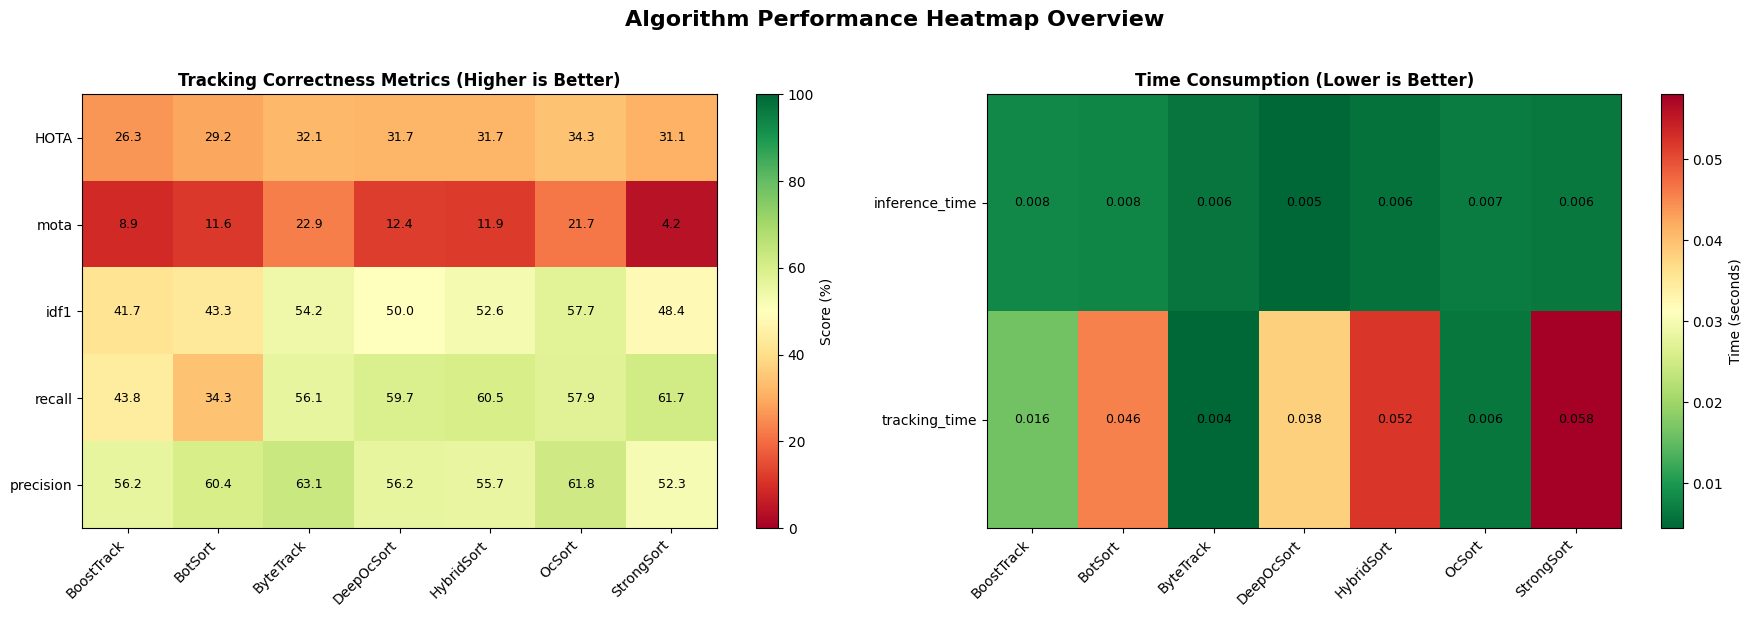

In [59]:
# Heatmap: Algorithm performance overview
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Select key metrics for heatmap
accuracy_metrics = ['HOTA', 'mota', 'idf1', 'recall', 'precision']
time_metrics = ['inference_time', 'tracking_time']

# Accuracy Heatmap
accuracy_data = df.groupby('algorithm')[accuracy_metrics].mean() * 100
im1 = axes[0].imshow(accuracy_data.T, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
axes[0].set_xticks(np.arange(len(algorithms)))
axes[0].set_yticks(np.arange(len(accuracy_metrics)))
axes[0].set_xticklabels(algorithms, rotation=45, ha='right')
axes[0].set_yticklabels(accuracy_metrics)
axes[0].set_title('Tracking Correctness Metrics (Higher is Better)', fontsize=12, fontweight='bold')

# Add text annotations
for i in range(len(accuracy_metrics)):
    for j in range(len(algorithms)):
        text = axes[0].text(j, i, f'{accuracy_data.iloc[j, i]:.1f}',
                           ha="center", va="center", color="black", fontsize=9)

plt.colorbar(im1, ax=axes[0], label='Score (%)')

# Time Performance Heatmap
time_data = df.groupby('algorithm')[time_metrics].mean()
im2 = axes[1].imshow(time_data.T, cmap='RdYlGn_r', aspect='auto')
axes[1].set_xticks(np.arange(len(algorithms)))
axes[1].set_yticks(np.arange(len(time_metrics)))
axes[1].set_xticklabels(algorithms, rotation=45, ha='right')
axes[1].set_yticklabels(time_metrics)
axes[1].set_title('Time Consumption (Lower is Better)', fontsize=12, fontweight='bold')

# Add text annotations
for i in range(len(time_metrics)):
    for j in range(len(algorithms)):
        text = axes[1].text(j, i, f'{time_data.iloc[j, i]:.3f}',
                           ha="center", va="center", color="black", fontsize=9)

plt.colorbar(im2, ax=axes[1], label='Time (seconds)')

fig.suptitle('Algorithm Performance Heatmap Overview', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

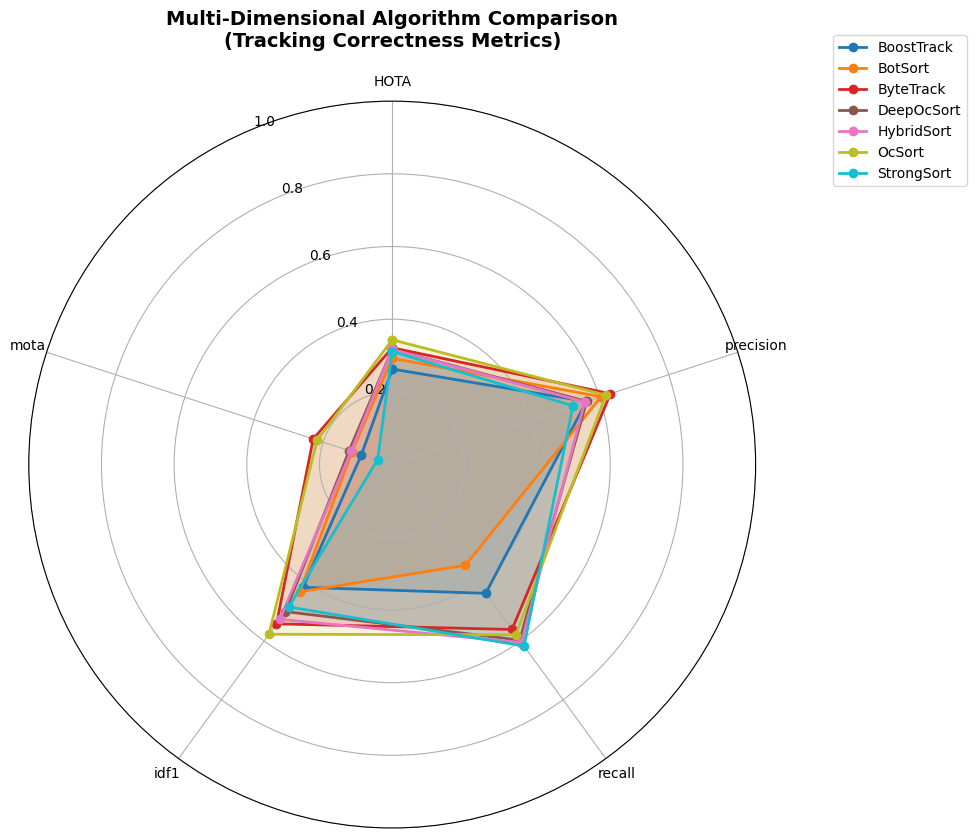

In [60]:
# Radar chart: Multi-dimensional comparison
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes."""
    theta = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)
    
    class RadarAxes(PolarAxes):
        name = 'radar'
        
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')
        
        def fill(self, *args, closed=True, **kwargs):
            return super().fill(closed=closed, *args, **kwargs)
        
        def plot(self, *args, **kwargs):
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)
        
        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)
        
        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)
        
        def _gen_axes_patch(self):
            return Circle((0.5, 0.5), 0.5)
        
        def _gen_axes_spines(self):
            spine = Spine(axes=self,
                         spine_type='circle',
                         path=Path.unit_circle())
            spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                              + self.transAxes)
            return {'polar': spine}
    
    register_projection(RadarAxes)
    return theta

# Normalize metrics to 0-1 scale (for radar chart)
radar_metrics = ['HOTA', 'mota', 'idf1', 'recall', 'precision']
radar_data = df.groupby('algorithm')[radar_metrics].mean() * 100

# Normalize to 0-1 scale
radar_data_norm = radar_data / 100

# Create radar chart
N = len(radar_metrics)
theta = radar_factory(N, frame='polygon')

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.95, bottom=0.05)

colors_map = plt.cm.tab10(np.linspace(0, 1, len(algorithms)))

for i, algo in enumerate(algorithms):
    values = radar_data_norm.loc[algo].values
    values = np.concatenate((values, [values[0]]))  # Close the plot
    ax.plot(theta, values[:-1], 'o-', linewidth=2, label=algo, color=colors_map[i])
    ax.fill(theta, values[:-1], alpha=0.15, color=colors_map[i])

ax.set_varlabels(radar_metrics)
ax.set_ylim(0, 1)
ax.set_title('Multi-Dimensional Algorithm Comparison\n(Tracking Correctness Metrics)', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

In [61]:
# Summary table with rankings
summary_df = df.groupby('algorithm').agg({
    'HOTA': 'mean',
    'mota': 'mean',
    'idf1': 'mean',
    'inference_time': 'mean',
    'tracking_time': 'mean',
    'num_switches': 'mean',
    'attempt': 'count'
})

# Convert percentage metrics to 0-100 scale
summary_df['HOTA'] = summary_df['HOTA'] * 100
summary_df['mota'] = summary_df['mota'] * 100
summary_df['idf1'] = summary_df['idf1'] * 100

summary_df = summary_df.round(3)

summary_df.columns = ['HOTA (↑)', 'MOTA (↑)', 'IDF1 (↑)', 
                      'Inference Time (↓)', 'Tracking Time (↓)', 
                      'ID Switches (↓)', 'Num Attempts']

# Add rankings (1 = best)
summary_df['HOTA Rank'] = summary_df['HOTA (↑)'].rank(ascending=False).astype(int)
summary_df['MOTA Rank'] = summary_df['MOTA (↑)'].rank(ascending=False).astype(int)
summary_df['IDF1 Rank'] = summary_df['IDF1 (↑)'].rank(ascending=False).astype(int)
summary_df['Inf Time Rank'] = summary_df['Inference Time (↓)'].rank(ascending=True).astype(int)
summary_df['Track Time Rank'] = summary_df['Tracking Time (↓)'].rank(ascending=True).astype(int)

# Calculate overall rank (average of all ranks, lower is better)
summary_df['Overall Rank'] = (
    summary_df['HOTA Rank'] + 
    summary_df['MOTA Rank'] + 
    summary_df['IDF1 Rank'] + 
    summary_df['Inf Time Rank'] + 
    summary_df['Track Time Rank']
) / 5

summary_df = summary_df.sort_values('Overall Rank')

print("\n" + "="*100)
print("ALGORITHM PERFORMANCE SUMMARY TABLE")
print("="*100)
print(summary_df)
print("\n(↑) = Higher is better, (↓) = Lower is better")
print("="*100)


ALGORITHM PERFORMANCE SUMMARY TABLE
            HOTA (↑)  MOTA (↑)  IDF1 (↑)  Inference Time (↓)  \
algorithm                                                      
ByteTrack     32.139    22.852    54.161               0.006   
OcSort        34.334    21.728    57.715               0.007   
DeepOcSort    31.695    12.443    49.999               0.005   
HybridSort    31.671    11.867    52.642               0.006   
StrongSort    31.089     4.242    48.434               0.006   
BotSort       29.246    11.607    43.286               0.008   
BoostTrack    26.289     8.896    41.741               0.008   

            Tracking Time (↓)  ID Switches (↓)  Num Attempts  HOTA Rank  \
algorithm                                                                 
ByteTrack               0.004             41.0            10          2   
OcSort                  0.006             35.0            10          1   
DeepOcSort              0.038             68.2            10          3   
HybridSort 

In [64]:
fps = 1 / (summary_df['Tracking Time (↓)'] + summary_df['Inference Time (↓)'])
print("\nFrames Per Second (FPS) based on Inference Time:")
print(fps)


Frames Per Second (FPS) based on Inference Time:
algorithm
ByteTrack     100.000000
OcSort         76.923077
DeepOcSort     23.255814
HybridSort     17.241379
StrongSort     15.625000
BotSort        18.518519
BoostTrack     41.666667
dtype: float64
